In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
year_needed = 19

In [2]:
post_data = pd.read_csv("SCU_FB.csv", index_col=0)
post_data.dropna(inplace = True)
print(post_data)


     month  day  year content_type  likes  comments  shares
0        1   10    20        photo     23         7       3
1        1    8    20        photo     92         3       2
2        1    7    20         post     27         0       2
3        1    6    20        photo    174         0       3
4        1    3    20        photo    191        24       5
..     ...  ...   ...          ...    ...       ...     ...
246      3    8    19        photo     19         1       2
247      3    7    19        photo     11         0       0
248      3    7    19        photo     26         1       3
249      3    7    19         post     52         1       4
250      3    7    19        video     33         1       0

[251 rows x 7 columns]


In [10]:
num_photo = post_data.groupby('content_type').content_type.count()[0]
num_post = post_data.groupby('content_type').content_type.count()[1]
num_video = post_data.groupby('content_type').content_type.count()[2]
total = post_data.loc[post_data.year == 20].groupby('content_type').content_type.count()
print(total[0])

4


In [5]:
labels = ['Photos', 'Posts', 'Videos']
sizes = [num_photo, num_post, num_video]
colors = ['red', 'green', 'blue']
explode = (0, 0, 0)

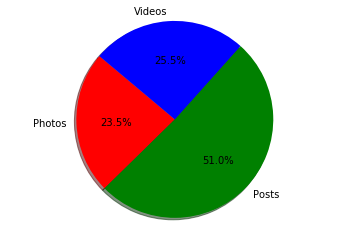

In [6]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [60]:
likes_month = post_data.loc[(post_data.year == 19)].groupby('month').likes.sum()
shares_month = post_data.loc[(post_data.year == 19)].groupby('month').shares.sum()
comments_month = post_data.loc[(post_data.year == 19)].groupby('month').comments.sum()


Text(0, 0.5, 'Engagements')

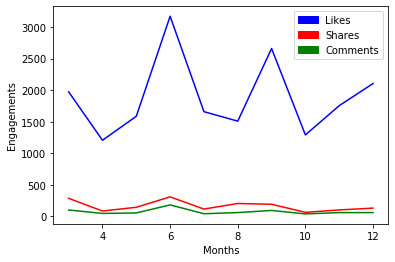

In [64]:
total = likes_month + shares_month + comments_month
plt.plot(likes_month, color = "blue")
plt.plot(shares_month, color = 'red')
plt.plot(comments_month, color = 'green')
blue_patch = mpatches.Patch(color='blue', label='Likes')
red_patch = mpatches.Patch(color='red', label='Shares')
green_patch = mpatches.Patch(color='green', label='Comments')
plt.legend(handles = [blue_patch, red_patch, green_patch])
plt.xlabel("Months")
plt.ylabel("Engagements")


Text(0.5, 0, 'Months')

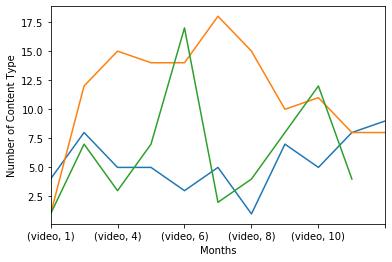

In [82]:
photos = post_data.loc[post_data.content_type == 'photo'].groupby(['content_type', 'month']).content_type.count()
posts = post_data.loc[post_data.content_type == 'post'].groupby(['content_type', 'month']).content_type.count()
videos = post_data.loc[post_data.content_type == 'video'].groupby(['content_type', 'month']).content_type.count()

photos.plot()
posts.plot()
videos.plot()
plt.ylabel('Number of Content Type')
plt.xlabel('Months')
